In [4]:
import pandas as pd #import pandas
import numpy as numpy #import numpy
from sklearn.utils import shuffle # to shuffle the data 
import random # import random
import sklearn # import sklearn
import nltk # import nltk
from nltk.corpus import stopwords #import stop words
import re # import regular expression
from nltk.tokenize import word_tokenize # import word_tokenize
import matplotlib
import matplotlib.pyplot as plt #import matplotlib.pyplot 
df = pd.read_csv("tweet.csv", encoding='latin-1', header=None) #read csv file without header as dataframe
from sklearn.feature_extraction.text import TfidfVectorizer #  import TF-idf vectorizer
df = shuffle(df) # shuffle csv file
#tweets1 = df.iloc[0:9999,]
#tweets1.to_csv('tweets1.csv', sep=',')
%matplotlib inline
#data
print(sklearn.__version__)
print(matplotlib.__version__)

1.0.2
3.2.2


In [5]:
df.head()

,0,1,2
4112,"Cool. Apple sets up 5,000 sq. ft. temporary st...",Apple,Positive emotion
7905,Maybe this strange Google logo from last autum...,NaN,No emotion toward brand or product
7480,"Google Maps 5.2 demo Renders very quickly, 3D ...",Other Google product or service,Positive emotion
6935,RT @mention Why Barry Diller thinks iPad only ...,NaN,No emotion toward brand or product
4030,Apple will be opening a temporary Apple Store ...,NaN,No emotion toward brand or product


In [6]:
df.columns = ["tweet", "product", "sentiment"]
df.head()

,tweet,product,sentiment
4112,"Cool. Apple sets up 5,000 sq. ft. temporary st...",Apple,Positive emotion
7905,Maybe this strange Google logo from last autum...,NaN,No emotion toward brand or product
7480,"Google Maps 5.2 demo Renders very quickly, 3D ...",Other Google product or service,Positive emotion
6935,RT @mention Why Barry Diller thinks iPad only ...,NaN,No emotion toward brand or product
4030,Apple will be opening a temporary Apple Store ...,NaN,No emotion toward brand or product


In [7]:
df.sentiment.value_counts() 

No emotion toward brand or product                    5389
Positive emotion                                      2978
Negative emotion                                       570
I can't tell                                           156
is_there_an_emotion_directed_at_a_brand_or_product       1
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x7fda3d5d06a0>,
 [Text(-1.0537924762133466, -0.3154701524330687, 'Negative'),
  Text(1.0991320502503799, 0.04368908459096829, 'Positive'),
  Text(0.33072587346988636, 1.0491045689623038, 'Neutral'),
  Text(0.060010572702170265, 1.098361839815986, 'Irrelevant'),
  Text(0.00037982678061957787, 1.0999999344234601, 'NA')],
 [Text(-0.5747958961163707, -0.17207462859985562, '59.3%'),
  Text(0.5995265728638435, 0.02383040977689179, '32.7%'),
  Text(0.18039593098357434, 0.5722388557976201, '6.3%'),
  Text(0.03273303965572923, 0.5991064580814468, '1.7%'),
  Text(0.00020717824397431517, 0.5999999642309782, '0.0%')])

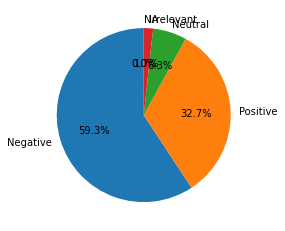

In [8]:
plt.pie(df.sentiment.value_counts(),labels=['Negative','Positive','Neutral','Irrelevant', 'NA'],autopct='%1.1f%%',startangle=90)

In [9]:
df.sentiment.value_counts()

No emotion toward brand or product                    5389
Positive emotion                                      2978
Negative emotion                                       570
I can't tell                                           156
is_there_an_emotion_directed_at_a_brand_or_product       1
Name: sentiment, dtype: int64

In [10]:
df.duplicated().sum()

22

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

tweet           1
product      5789
sentiment       0
dtype: int64

In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
df.isnull().sum()

tweet        0
product      0
sentiment    0
dtype: int64

In [16]:
df.reset_index(inplace=True)

In [17]:
df.shape

(3283, 4)

In [18]:
df.head()

,index,tweet,product,sentiment
0,4112,"Cool. Apple sets up 5,000 sq. ft. temporary st...",Apple,Positive emotion
1,7480,"Google Maps 5.2 demo Renders very quickly, 3D ...",Other Google product or service,Positive emotion
2,3193,#sxsw Ze Frank I missed the Childhood Walk pro...,Other Google product or service,Positive emotion
3,470,"Before It Even Begins, Apple Wins #SXSW {link}...",Apple,Positive emotion
4,6056,RT @mention I hope everyone has an awesome wee...,Apple,Positive emotion


In [19]:
replace_list = {r"i'm": 'i am',
                r"'re": ' are',
                r"let’s": 'let us',
                r"'s":  ' is',
                r"'ve": ' have',
                r"can't": 'can not',
                r"cannot": 'can not',
                r"shan’t": 'shall not',
                r"n't": ' not',
                r"'d": ' would',
                r"'ll": ' will',
                r"'scuse": 'excuse',
                ',': ' ,',
                '.': ' .',
                '!': ' !',
                '?': ' ?',
                '\s+': ' '}
def clean_text(text):
    text = text.lower()
    for s in replace_list:
        text = text.replace(s, replace_list[s])
    text = ' '.join(text.split())
    return text

In [20]:
x = df['tweet'].apply(lambda p: clean_text(p))

In [21]:
x[20]

'google will not launch facebook competitor circles @mention #sxsw today as thought , creeper half-friends the world over disappointed .'

max Tweet_content len: 37


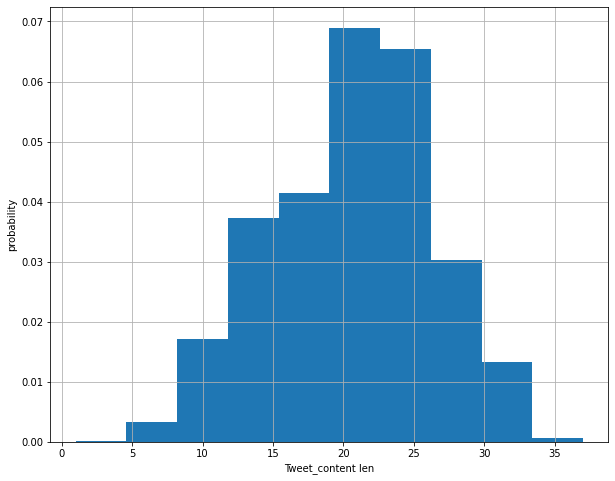

In [22]:
Tweet_content_len = x.apply(lambda p: len(p.split(' ')))
max_Tweet_content_len = Tweet_content_len.max()
print('max Tweet_content len: {0}'.format(max_Tweet_content_len))
plt.figure(figsize = (10, 8))
plt.hist(Tweet_content_len, density = True)
plt.xlabel('Tweet_content len')
plt.ylabel('probability')
plt.grid()

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
import re 
REPLACE_WITH_SPACE = re.compile("(@)")
SPACE = " "
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
#1
def reviews(reviews):  
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line.lower()) for line in reviews]
    
    return reviews
#2
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split()  if word not in english_stop_words]))
    return removed_stop_words
#3
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()

    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]    

In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
label_encoder= LabelEncoder()
df[['sentiment']] = df[['sentiment']].apply(label_encoder.fit_transform)


In [26]:
y = df['sentiment']

In [27]:
#1
reviewtweet = reviews(x)
#2
no_stop_words_tweet = remove_stop_words(reviewtweet)
#3
stemmed_reviews_tweet = get_stemmed_text(no_stop_words_tweet)

In [28]:
stemmed_reviews_tweet[20]

'googl launch facebook competitor circl mention #sxsw today thought , creeper half-friend world disappoint .'

In [29]:
max_words = 8000


tokenizer = Tokenizer(
    num_words = max_words,
    filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
)
tokenizer.fit_on_texts(stemmed_reviews_tweet)
x = tokenizer.texts_to_sequences(stemmed_reviews_tweet)
x = pad_sequences(x, maxlen = 300)

In [30]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(y)

y = np.array(label_tokenizer.texts_to_sequences(y))

AttributeError: ignored

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [32]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = max_words, output_dim = 128, input_length = 300))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(128, dropout = 0.3, recurrent_dropout = 0.3))
model_lstm.add(Dense(128, activation = 'relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(5, activation = 'softmax'))
model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [33]:
history = model_lstm.fit(
    x_train,
    y_train,
    validation_data=(x_test,y_test), epochs = 10,
    batch_size = 512
   )

Epoch 1/10
6/6 [==============================] - 34s 5s/step - loss: 1.5499 - accuracy: 0.6283 - val_loss: 1.0708 - val_accuracy: 0.8219
Epoch 2/10
6/6 [==============================] - 30s 5s/step - loss: 0.8517 - accuracy: 0.8088 - val_loss: 0.6301 - val_accuracy: 0.8219
Epoch 3/10
6/6 [==============================] - 29s 5s/step - loss: 0.6521 - accuracy: 0.8054 - val_loss: 0.6189 - val_accuracy: 0.8219
Epoch 4/10
6/6 [==============================] - 29s 5s/step - loss: 0.6263 - accuracy: 0.8039 - val_loss: 0.5802 - val_accuracy: 0.8219
Epoch 5/10
6/6 [==============================] - 28s 5s/step - loss: 0.6169 - accuracy: 0.8088 - val_loss: 0.5660 - val_accuracy: 0.8219
Epoch 6/10
6/6 [==============================] - 34s 6s/step - loss: 0.6032 - accuracy: 0.8085 - val_loss: 0.5659 - val_accuracy: 0.8219
Epoch 7/10
6/6 [==============================] - 35s 6s/step - loss: 0.5848 - accuracy: 0.8088 - val_loss: 0.5680 - val_accuracy: 0.8219
Epoch 8/10
6/6 [==================

In [34]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          1024000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                        

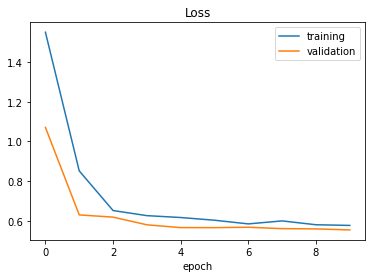

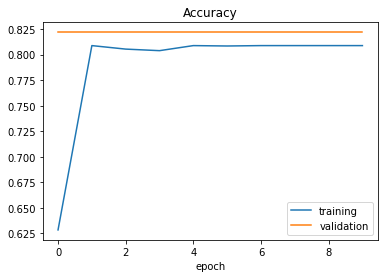

In [35]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [37]:
y_pred = model_lstm.predict(x_test)

21/21 [==============================] - 2s 93ms/step


In [43]:
pd.set_option('display.max_colwidth', None)
df.head()

,index,tweet,product,sentiment
0,4112,"Cool. Apple sets up 5,000 sq. ft. temporary store at #SXSW to sell iPad 2's. {link}",Apple,3
1,7480,"Google Maps 5.2 demo Renders very quickly, 3D buildings and landscapes included in the basic maps. #MarissaGoogle #sxsw",Other Google product or service,3
2,3193,"#sxsw Ze Frank I missed the Childhood Walk project, with google street view, enables stunning revelations {link}",Other Google product or service,3
3,470,"Before It Even Begins, Apple Wins #SXSW {link} /by @mention for @mention",Apple,3
4,6056,RT @mention I hope everyone has an awesome weekend at #SXSW! I know @mention is giving away some great Apple prizes.,Apple,3


In [45]:
input = ['Before It Even Begins, Apple Wins #SXSW {link} /by @mention for @mention']
input = tokenizer.texts_to_sequences(['input'])
input = pad_sequences(input,maxlen = 100)

In [46]:
out = model_lstm.predict(input)

1/1 [==============================] - 0s 31ms/step


In [47]:
out

array([[0.00222323, 0.13542843, 0.01944444, 0.84169936, 0.0012046 ]],
      dtype=float32)